In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.constants import golden
plt.style.use('default')
plt.rc('figure', figsize=((5.0, 5.0 / golden)))

# VARIABILI
csvfile = '/home/jovyan/tesi/csv/alldata.csv'
distance_param = 'CDistance'
colori = ['blue', 'red', 'orange', 'limegreen', 'purple']
myindex = [
    '7:00', '8:00', '9:00', '10:00',
    '11:00', '12:00', '13:00', '14:00',
    '15:00','16:00', '17:00', '18:00',
    '19:00', '20:00', '21:00', '22:00',
    '23:00']

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
replace = {}
replace['Car'] = 'Auto'
replace['Public'] = 'ATM'
replace['Bike'] = 'Bici'
replace['Foot'] = 'A piedi'
replace['Enjoy'] = 'Enjoy'

# Velocita' media durante il giorno
def vmedia_giorno(df, mezzo):
    ore = range(7, 24)
    vmedia_giorno_ore = []
    for ora in ore:
        tragitti_fascia_oraria = df[df['Hour'] == ora]
        velocita_media_oraria = (tragitti_fascia_oraria[distance_param] * 60.) / tragitti_fascia_oraria[mezzo]
        vmedia_giorno_ore.append(velocita_media_oraria.mean())
    return vmedia_giorno_ore
    
def vmedia_week(df, mezzo):    
    lst = [vmedia_giorno(df, mezzo)]
    array = np.array(lst).T
    
    return pd.DataFrame(array, index=myindex, columns=[replace[mezzo]]).round(2)

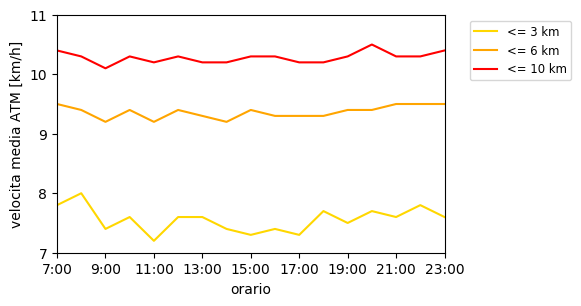

In [3]:
tragitti = tragitti[clean(tragitti)]

distance_param = 'CDistance'
lst = [
    vmedia_giorno(tragitti[tragitti[distance_param] <= 3.0], 'Public'),
    vmedia_giorno(tragitti[tragitti[distance_param] <= 6.0], 'Public'),
    vmedia_giorno(tragitti[tragitti[distance_param] <= 10.0], 'Public')]

array = np.array(lst).T

x = pd.DataFrame(array, index=myindex, columns=['<= 3 km', '<= 6 km', '<= 10 km']).round(1)
x.plot(color=['gold', 'orange', 'red'])
plt.yticks(range(7, 12, 1))
plt.xlabel('orario')
plt.ylabel('velocita media ATM [km/h]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()